<a href="https://colab.research.google.com/github/Gustavolorenzz/IA/blob/main/DecisionTreeJogar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [47]:
base = pd.read_csv('https://raw.githubusercontent.com/Gustavolorenzz/IA/main/Bases/jogar.csv')
base

,dia,aparencia,temperatura,umidade,ventando,jogar
0,d1,sol,Quente,Alta,nao,nao
1,d2,sol,Quente,Alta,sim,nao
2,d3,Nublado,Quente,Alta,nao,sim
3,d4,Chuva,Agradavel,Alta,nao,sim
4,d5,Chuva,Fria,Normal,nao,sim
5,d6,Chuva,Fria,Normal,sim,nao
6,d7,Nublado,Fria,Normal,sim,sim
7,d8,sol,Agradavel,Alta,nao,nao
8,d9,sol,Fria,Normal,nao,sim
9,d10,Chuva,Agradavel,Normal,nao,sim


In [48]:
X_jogar = base.iloc[:, 1:5].values
X_jogar

array([['sol', 'Quente', 'Alta', 'nao'],
       ['sol', 'Quente', 'Alta', 'sim'],
       ['Nublado', 'Quente', 'Alta', 'nao'],
       ['Chuva', 'Agradavel', 'Alta', 'nao'],
       ['Chuva', 'Fria', 'Normal', 'nao'],
       ['Chuva', 'Fria', 'Normal', 'sim'],
       ['Nublado', 'Fria', 'Normal', 'sim'],
       ['sol', 'Agradavel', 'Alta', 'nao'],
       ['sol', 'Fria', 'Normal', 'nao'],
       ['Chuva', 'Agradavel', 'Normal', 'nao'],
       ['sol', 'Agradavel', 'Normal', 'sim'],
       ['Nublado', 'Agradavel', 'Alta', 'sim'],
       ['Nublado', 'Quente', 'Normal', 'nao'],
       ['Chuva', 'Agradavel', 'Alta', 'sim']], dtype=object)

In [49]:
Y_jogar = base.iloc[:, 5].values
Y_jogar

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder_aparencia = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_umidade = LabelEncoder()
label_encoder_ventando = LabelEncoder()

In [51]:
X_jogar[:,0] = label_encoder_aparencia.fit_transform(X_jogar[:, 0])
X_jogar[:,1] = label_encoder_temperatura.fit_transform(X_jogar[:, 1])
X_jogar[:,2] = label_encoder_umidade.fit_transform(X_jogar[:, 2])
X_jogar[:,3] = label_encoder_ventando.fit_transform(X_jogar[:, 3])
X_jogar

array([[2, 2, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [2, 0, 0, 0],
       [2, 1, 1, 0],
       [0, 0, 1, 0],
       [2, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 2, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [52]:
import pickle
with open('jogar.pkl', 'wb') as f:
  pickle.dump([X_jogar, Y_jogar], f)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_jogar, Y_jogar, test_size = 0.2, random_state = 23)

In [54]:

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:

Y_pred = dtc.predict(X_test)
Y_pred

array(['nao', 'nao', 'sim'], dtype=object)

In [56]:
Y_test

array(['nao', 'nao', 'sim'], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(Y_test,Y_pred)

1.0

In [58]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(Y_test,Y_pred)

array([[2, 0],
       [0, 1]])

<Axes: >

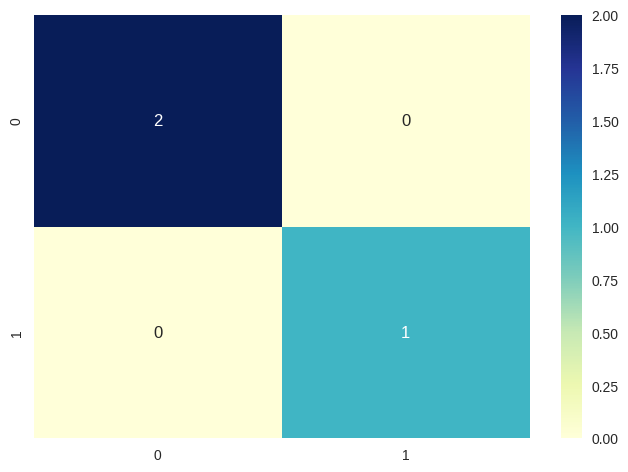

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [60]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         nao       1.00      1.00      1.00         2
         sim       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

